<a href="https://colab.research.google.com/github/Abheek03/CyberThreat-Detection/blob/main/Project_Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/CSV Files/Training and Testing Sets/UNSW_NB15_training-set.csv")

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Drop columns with too many missing values or where missing values are not informative
data.drop(columns=['ct_ftp_cmd', 'is_ftp_login'], inplace=True)

# Impute missing values for numerical columns with mean or median
numerical_columns = data.select_dtypes(include=np.number).columns.tolist()
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

# Impute missing values for categorical columns with mode
categorical_columns = data.select_dtypes(include='object').columns.tolist()
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

# Check for missing values after imputation
missing_values_after = data.isnull().sum()
print("\nMissing Values After Imputation:")
print(missing_values_after)

# Define features and target variable
X = data.drop(columns=['id', 'attack_cat', 'label'])  # Exclude non-predictive columns
y = data['label']  # Target variable

# Perform one-hot encoding for categorical variables
X = pd.get_dummies(X)

# Apply feature scaling to numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Handle imbalanced data using SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature selection using feature importances
feature_importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
selected_features = feature_importance_df.nlargest(10, 'Importance')['Feature'].values

# Convert feature names to indices in X_train_resampled
selected_feature_indices = [list(X.columns).index(feature) for feature in selected_features]

# Index X_train_resampled with selected feature indices
X_train_selected = X_train_resampled[:, selected_feature_indices]

# Train the Random Forest classifier with selected features
rf_classifier_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_selected.fit(X_train_selected, y_train_resampled)

# Make predictions using selected features for X_test
X_test_selected = X_test[:, selected_feature_indices]
y_pred_selected = rf_classifier_selected.predict(X_test_selected)

# Evaluate the model with selected features
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("\nAccuracy with Selected Features:", accuracy_selected)

print("\nClassification Report with Selected Features:")
print(classification_report(y_test, y_pred_selected))

# Cross-validation to ensure robust performance
cv_scores = cross_val_score(rf_classifier_selected, X_train_selected, y_train_resampled, cv=5)
print("\nCross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Missing Values:
id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports   

In [ ]:
# Select a random data point from the dataset
random_index = np.random.randint(0, len(X_test))
random_data_point = X_test[random_index].reshape(1, -1)

print("Random Data Point:")
print(random_data_point)

# Extract only the selected features from the random data point
random_data_point_selected = random_data_point[:, selected_feature_indices]

# Use the trained model to make a prediction
prediction = rf_classifier_selected.predict(random_data_point_selected)

# Convert prediction to human-readable format
prediction_label = "Anomaly" if prediction == 1 else "Normal"
print("\nPrediction for Random Data Point:", prediction_label)

Random Data Point:
[[-2.09773204e-01 -1.33676946e-01 -1.72047364e-01 -4.26563534e-02
  -1.03922888e-01  2.77738895e-02  7.23267994e-01 -7.20405876e-01
   2.56187027e+00 -2.77208134e-01 -7.50399195e-02 -1.31758667e-01
  -1.36141426e-01 -8.93700295e-02 -1.10667736e-01 -1.48817806e-01
  -9.15407343e-01 -7.15176532e-01 -7.15568770e-01 -9.06431544e-01
  -5.21659615e-01 -4.84345974e-01 -5.03013700e-01  2.72746250e+00
  -4.80702816e-01 -1.36415097e-01 -3.95568747e-02 -5.89149852e-01
   7.29064148e-01 -5.20827153e-01 -4.20467777e-01 -3.81469540e-01
  -6.14255735e-01 -1.89768056e-01  2.52890577e+00 -6.60110616e-01
  -1.26507963e-01 -2.38881292e-02 -2.38881292e-02 -2.38881292e-02
  -4.13990842e-02 -2.36479064e-02 -2.38881292e-02 -1.28746428e-01
  -2.38881292e-02 -2.36479064e-02 -2.38881292e-02 -2.38881292e-02
  -2.37683206e-02 -2.38881292e-02 -2.37683206e-02 -2.38881292e-02
  -2.38881292e-02 -2.38881292e-02 -2.37683206e-02 -2.38881292e-02
  -2.37683206e-02 -2.38881292e-02 -2.38881292e-02 -2.3888

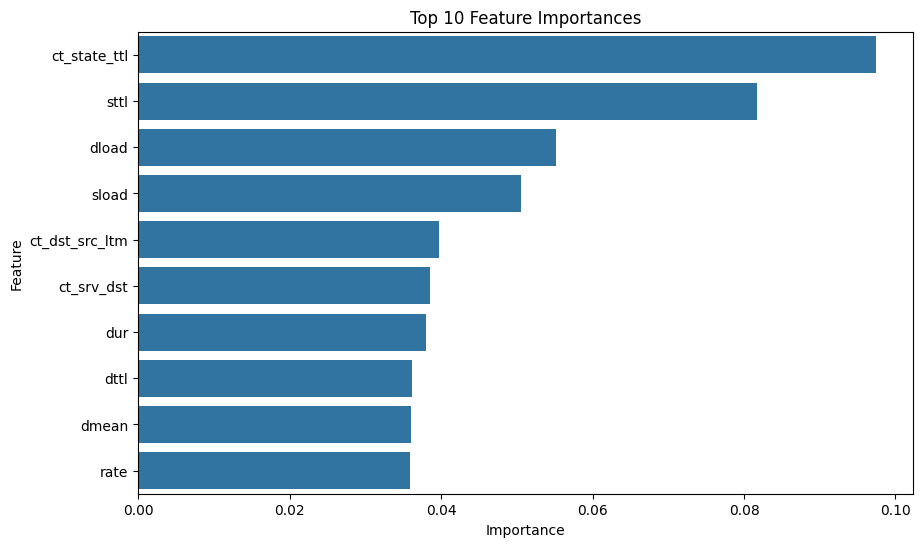

In [ ]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.nlargest(10, 'Importance'))
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

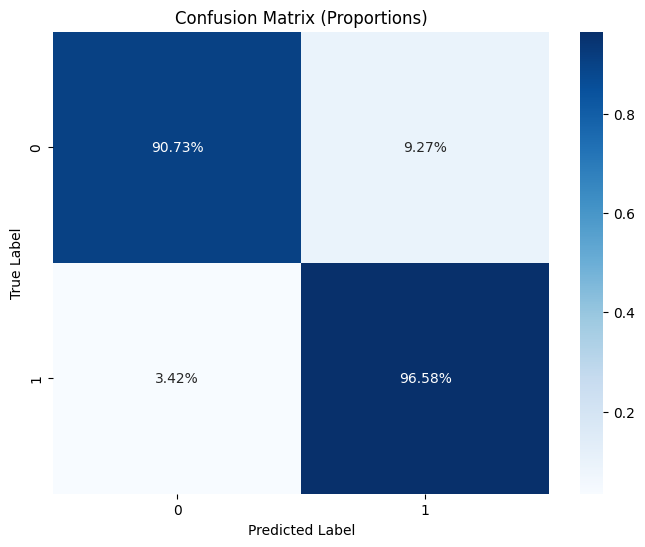

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_selected)

# Calculate proportions
conf_matrix_prop = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix with proportions
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_prop, annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix (Proportions)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


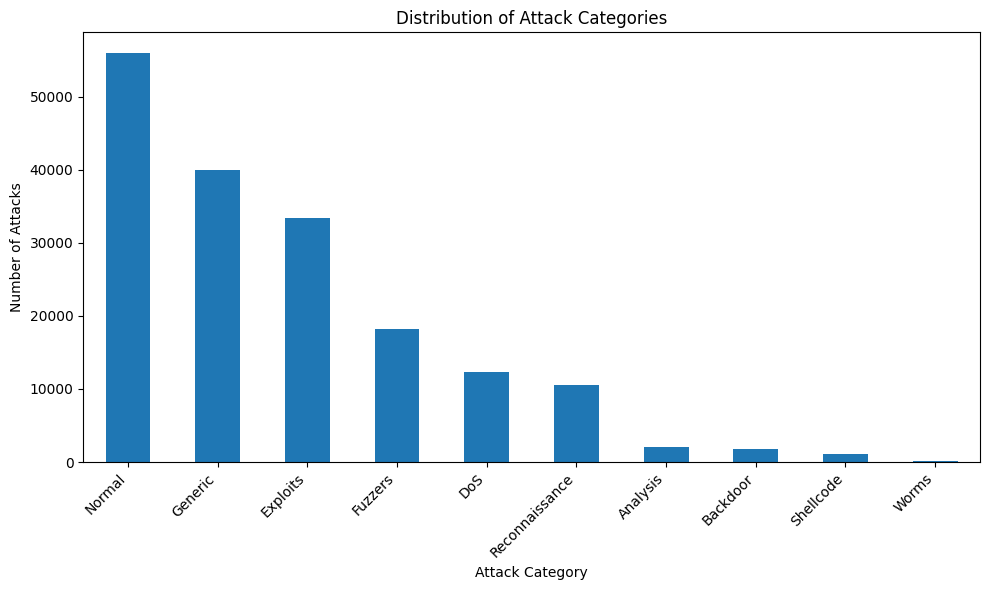

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the UNSW_NB15 dataset
dataset = pd.read_csv("/content/drive/MyDrive/CSV Files/Training and Testing Sets/UNSW_NB15_training-set.csv")

# Plot the distribution of attack categories
plt.figure(figsize=(10, 6))
dataset['attack_cat'].value_counts().plot(kind='bar')
plt.title('Distribution of Attack Categories')
plt.xlabel('Attack Category')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

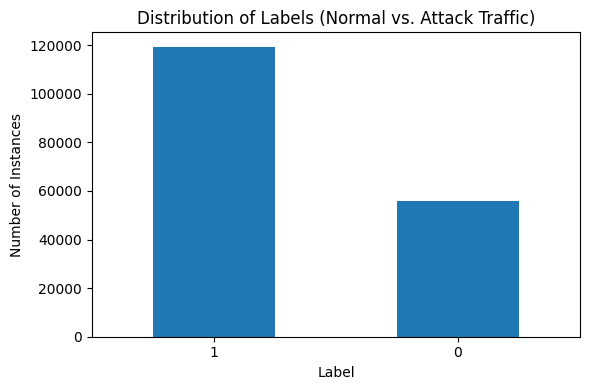

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the UNSW_NB15 dataset
dataset = pd.read_csv("/content/drive/MyDrive/CSV Files/Training and Testing Sets/UNSW_NB15_training-set.csv")

# Plot the distribution of labels
plt.figure(figsize=(6, 4))
dataset['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Labels (Normal vs. Attack Traffic)')
plt.xlabel('Label')
plt.ylabel('Number of Instances')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


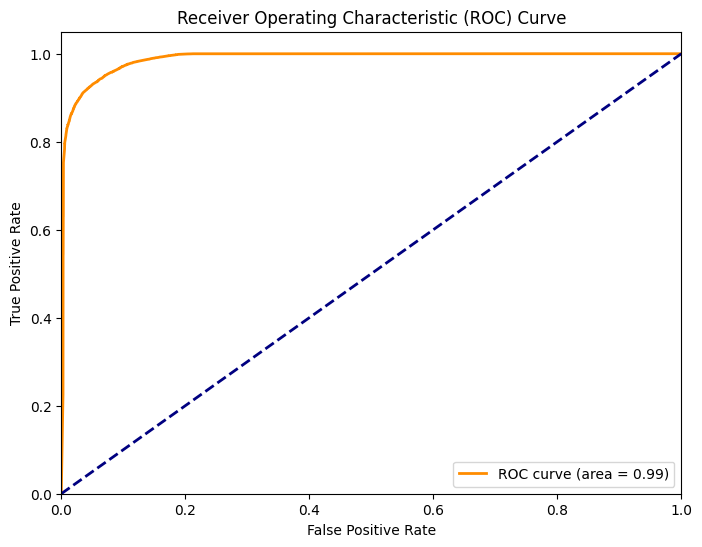

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, rf_classifier_selected.predict_proba(X_test_selected)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/CSV Files/Training and Testing Sets/UNSW_NB15_training-set.csv")

# Take user input
user_input = input("Enter the input : ")

label_encodings = {}

# Split user input into a list
user_input_list = user_input.split(',')
# Define categorical columns
categorical_columns = ['proto', 'service', 'state', 'attack_cat']

# Update label-encoded values in the list
for i, value in enumerate(user_input_list):
    if i < len(categorical_columns):  # Check if the value corresponds to a categorical column
        column_name = categorical_columns[i]
        if value in label_encodings.get(column_name, {}):
            user_input_list[i] = str(label_encodings[column_name][value])  # Convert to string to ensure uniformity

# It's important to ensure all elements in user_input_list are strings before creating a dataframe,
# especially if categorical variables were updated above.
user_input_list = [str(item) for item in user_input_list]

# Create a DataFrame with user input
user_input_df = pd.DataFrame([user_input_list], columns=data.columns)

# Drop columns with too many missing values or where missing values are not informative
data.drop(columns=['id', 'ct_ftp_cmd', 'is_ftp_login'], inplace=True)

# Impute missing values for numerical columns with median
numerical_columns = data.select_dtypes(include=np.number).columns.tolist()
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

# Impute missing values for categorical columns with mode
categorical_columns = data.select_dtypes(include='object').columns.tolist()
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

# Label encode categorical variables
label_encoder = LabelEncoder()
data[categorical_columns] = data[categorical_columns].apply(lambda col: label_encoder.fit_transform(col.astype(str)))

# Define features and target variable
X = data.drop(columns=['label'])  # Exclude non-predictive columns
y = data['label']  # Target variable

# Apply feature scaling to numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle imbalanced data using SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

# Take the last data point as the user input
user_input_data = X_scaled[-1:]

# Make prediction
prediction = rf_classifier.predict(user_input_data)

# Print prediction result
print("Prediction:", "Anomaly" if prediction == 1 else "Normal")


Enter the input : 197,0.001064,udp,dns,CON,2,2,132,164,2819.548997,31,29,496240.625,616541.375,0,0,0.009,0.007,0,0,0,0,0,0,0,0,0,66,82,0,0,8,0,1,2,1,3,0,0,0,4,3,0,Normal,0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     23851
           1       1.00      1.00      1.00     23886

    accuracy                           1.00     47737
   macro avg       1.00      1.00      1.00     47737
weighted avg       1.00      1.00      1.00     47737

Prediction: Anomaly


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/CSV Files/Training and Testing Sets/UNSW_NB15_training-set.csv")

# Take user input
user_input = input("Enter the input : ")


label_encodings = {
'proto': {'3pc': 0, 'a/n': 1, 'aes-sp3-d': 2, 'any': 3, 'argus': 4, 'aris': 5, 'arp': 6, 'ax.25': 7, 'bbn-rcc': 8, 'bna': 9, 'br-sat-mon': 10, 'cbt': 11, 'cftp': 12, 'chaos': 13, 'compaq-peer': 14, 'cphb': 15, 'cpnx': 16, 'crtp': 17, 'crudp': 18, 'dcn': 19, 'ddp': 20, 'ddx': 21, 'dgp': 22, 'egp': 23, 'eigrp': 24, 'emcon': 25, 'encap': 26, 'etherip': 27, 'fc': 28, 'fire': 29, 'ggp': 30, 'gmtp': 31, 'gre': 32, 'hmp': 33, 'i-nlsp': 34, 'iatp': 35, 'ib': 36, 'icmp': 37, 'idpr': 38, 'idpr-cmtp': 39, 'idrp': 40, 'ifmp': 41, 'igmp': 42, 'igp': 43, 'il': 44, 'ip': 45, 'ipcomp': 46, 'ipcv': 47, 'ipip': 48, 'iplt': 49, 'ipnip': 50, 'ippc': 51, 'ipv6': 52, 'ipv6-frag': 53, 'ipv6-no': 54, 'ipv6-opts': 55, 'ipv6-route': 56, 'ipx-n-ip': 57, 'irtp': 58, 'isis': 59, 'iso-ip': 60, 'iso-tp4': 61, 'kryptolan': 62, 'l2tp': 63, 'larp': 64, 'leaf-1': 65, 'leaf-2': 66, 'merit-inp': 67, 'mfe-nsp': 68, 'mhrp': 69, 'micp': 70, 'mobile': 71, 'mtp': 72, 'mux': 73, 'narp': 74, 'netblt': 75, 'nsfnet-igp': 76, 'nvp': 77, 'ospf': 78, 'pgm': 79, 'pim': 80, 'pipe': 81, 'pnni': 82, 'pri-enc': 83, 'prm': 84, 'ptp': 85, 'pup': 86, 'pvp': 87, 'qnx': 88, 'rdp': 89, 'rsvp': 90, 'rtp': 91, 'rvd': 92, 'sat-expak': 93, 'sat-mon': 94, 'sccopmce': 95, 'scps': 96, 'sctp': 97, 'sdrp': 98, 'secure-vmtp': 99, 'sep': 100, 'skip': 101, 'sm': 102, 'smp': 103, 'snp': 104, 'sprite-rpc': 105, 'sps': 106, 'srp': 107, 'st2': 108, 'stp': 109, 'sun-nd': 110, 'swipe': 111, 'tcf': 112, 'tcp': 113, 'tlsp': 114, 'tp++': 115, 'trunk-1': 116, 'trunk-2': 117, 'ttp': 118, 'udp': 119, 'unas': 120, 'uti': 121, 'vines': 122, 'visa': 123, 'vmtp': 124, 'vrrp': 125, 'wb-expak': 126, 'wb-mon': 127, 'wsn': 128, 'xnet': 129, 'xns-idp': 130, 'xtp': 131, 'zero': 132},
'service': {'-': 0, 'dhcp': 1, 'dns': 2, 'ftp': 3, 'ftp-data': 4, 'http': 5, 'irc': 6, 'pop3': 7, 'radius': 8, 'smtp': 9, 'snmp': 10, 'ssh': 11, 'ssl': 12},
'state': {'CON': 0, 'ECO': 1, 'FIN': 2, 'INT': 3, 'PAR': 4, 'REQ': 5, 'RST': 6, 'URN': 7, 'no': 8},
'attack_cat': {'Analysis': 0, 'Backdoor': 1, 'DoS': 2, 'Exploits': 3, 'Fuzzers': 4, 'Generic': 5, 'Normal': 6, 'Reconnaissance': 7, 'Shellcode': 8, 'Worms': 9}
}

# Split user input into a list
user_input_list = user_input.split(',')
# Define categorical columns
categorical_columns = ['proto', 'service', 'state', 'attack_cat']

# Update label-encoded values in the list
for i, value in enumerate(user_input_list):
    if i < len(categorical_columns):  # Check if the value corresponds to a categorical column
        column_name = categorical_columns[i]
        if value in label_encodings.get(column_name, {}):
            user_input_list[i] = str(label_encodings[column_name][value])  # Convert to string to ensure uniformity

# It's important to ensure all elements in user_input_list are strings before creating a dataframe,
# especially if categorical variables were updated above.
user_input_list = [str(item) for item in user_input_list]

# Create a DataFrame with user input
user_input_df = pd.DataFrame([user_input_list], columns=data.columns)

# Drop columns with too many missing values or where missing values are not informative
data.drop(columns=['id', 'ct_ftp_cmd', 'is_ftp_login'], inplace=True)


# Impute missing values for numerical columns with median
numerical_columns = data.select_dtypes(include=np.number).columns.tolist()
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

# Impute missing values for categorical columns with mode
categorical_columns = data.select_dtypes(include='object').columns.tolist()
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

# Label encode categorical variables
data[categorical_columns] = data[categorical_columns].apply(lambda col: label_encoder.fit_transform(col.astype(str)))

# Define features and target variable
X = data.drop(columns=['label'])  # Exclude non-predictive columns
y = data['label']  # Target variable

# Label encode categorical variables
label_encoder = LabelEncoder()
for column in categorical_columns:
    X[column] = label_encoder.fit_transform(X[column])

# Apply feature scaling to numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle imbalanced data using SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_resampled, y_resampled)

# Take the last data point as the user input
user_input_data = X_scaled[-1:]

# Make prediction
prediction = rf_classifier.predict(user_input_data)

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

# Print prediction result
print("Prediction:", "Anomaly" if prediction == 1 else "Normal")


Enter the input : data,FIN,6,8,320,1826,4219.409359,31,29,693281.4375,4149302.25,1,2,0.551,0.363857,30.809398,0.614728,255,2022074493,4180968900,255,0.000665,0.000531,0.000134,53,228,0,0,3,0,10,1,1,4,0,0,0,13,3,0,Normal,0


ValueError: 45 columns passed, passed data had 42 columns

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the UNSW-NB15 dataset
df = pd.read_csv('/content/drive/MyDrive/CSV Files/Training and Testing Sets/UNSW_NB15_training-set.csv')

# Take user input dynamically
print("\nPlease enter the details for the user input separated by commas:")
user_input = input().split(',')

# Create a new DataFrame for user input
user_df = pd.DataFrame([user_input], columns=df.columns)

# Concatenate user input as a new row to the dataset
df = pd.concat([df, user_df], ignore_index=True)

# Preprocessing
# Label encode categorical variables
label_encoders = {}
for column in ['proto', 'service', 'state']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Split features and target variable
X = df.drop(['attack_cat', 'label'], axis=1)
y = df['attack_cat']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions on testing set
y_pred = clf.predict(X_test)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Prediction for user input
user_input_scaled = scaler.transform(df.iloc[[-1]].drop(['attack_cat', 'label'], axis=1))
user_prediction = clf.predict(user_input_scaled)
print("\nPredicted attack category for user input:", user_prediction[0])



Please enter the details for the user input separated by commas:
172,0.00001,udp,-,INT,2,0,1254,0,100000.0025,254,0,501600000,0,0,0,0.01,0,0,0,0,0,0,0,0,0,0,627,0,0,0,63,2,7,7,1,63,0,0,0,8,62,0,Normal,0

Classification Report:
                precision    recall  f1-score   support

      Analysis       0.29      0.24      0.26       406
      Backdoor       0.18      0.17      0.17       366
           DoS       0.39      0.37      0.38      2515
      Exploits       0.74      0.79      0.76      6669
       Fuzzers       0.82      0.88      0.85      3580
       Generic       0.99      0.98      0.99      8001
        Normal       0.99      0.97      0.98     11141
Reconnaissance       0.78      0.76      0.77      2123
     Shellcode       0.72      0.72      0.72       242
         Worms       0.88      0.27      0.41        26

      accuracy                           0.85     35069
     macro avg       0.68      0.61      0.63     35069
  weighted avg       0.85      0.85      0